# MotoGP
Za projekt pri predmetu Programiranje 1 bom analizirala dirke v zgodovini tekmovanja MotoGP. Podatke sem dobila na strani [Autosport](http://classic.autosport.com/results.php?s=80&y=0&c=0), kjer sem zajela rezultate vseh dirk v kraljevem razredu od začetka tekmovanja, leta 1949, do konca sezone 2016, ter skupne rezultate teh sezon.
## Zajeti podatki
### Rezultati dirk:
- leto
- dirka
- prvi trije in njihovi motocikli

### Skupni rezultati:
- leto
- prvak
- podprvak
- zmagovalno moštvo
- drugo moštvo

## Analiza
Na podlagi rezultatov dirk bom določila dirkače z največ zmagami (ter drugimi in tretjimi mesti) in tiste z največ naslovi, dirkališča, na katerih je potekalo največ dirk in dirkače ter proizvajalce, ki so na njih najboljši. Primerjala bom kako se spreminjajo moči proizvajalcev skozi leta. Ugotovila bom ali je zmagovalec največ dirk v sezoni vedno tudi prvak, oziroma kako pogosto se to zgodi.

In [13]:
import pandas as pd
%matplotlib inline

pd.options.display.max_rows = 20

Poglejmo si tabeli s podatki o dirkah in skupnih rezultatih.

In [67]:
rezultati_dirk = pd.read_csv('csv-datoteke/rezultati_dirk.csv')
rezultati_dirk

,Leto,Dirka,Zmagovalec,Mostvo_zmagovalca,Drugi,Mostvo_drugega,Tretji,Mostvo_tretjega
0,1949,Tourist Trophy,Harold Daniell,Norton,Johnny Lockett,Norton,Ernie Lyons,Velocette
1,1949,Switzerland,Leslie Graham,AJS,Arciso Artesiani,Gilera,Harold Daniell,Norton
2,1949,Netherlands,Nello Pagani,Gilera,Leslie Graham,AJS,Arciso Artesiani,Gilera
3,1949,Belgium,William Doran,AJS,Arciso Artesiani,Gilera,Enrico Lorenzetti,Moto Guzzi
4,1949,Ulster,Leslie Graham,AJS,Artie Bell,Norton,Nello Pagani,Gilera
5,1949,Nations,Nello Pagani,Gilera,Arciso Artesiani,Gilera,William Doran,AJS
6,1950,Tourist Trophy,Geoff Duke,Norton,Artie Bell,Norton,Johnny Lockett,Norton
7,1950,Belgium,Umberto Masetti,Gilera,Nello Pagani,Gilera,Edward Frend,AJS
8,1950,Netherlands,Umberto Masetti,Gilera,Nello Pagani,Gilera,Harry Hinton Sr.,Norton
9,1950,Switzerland,Leslie Graham,AJS,Umberto Masetti,Gilera,Carlo Bandirola,Gilera


In [9]:
skupni_rezultati = pd.read_csv('csv-datoteke/skupni_rezultati.csv',index_col = 'Leto' )
skupni_rezultati

,Prvak,Podprvak,Prvi_proizvajalec,Drugi_proizvajalec
Leto,,,,
1949,Leslie Graham,Nello Pagani,AJS,Gilera
1950,Umberto Masetti,Geoff Duke,Norton,Gilera
1951,Geoff Duke,Alfredo Milani,Norton,Gilera
1952,Umberto Masetti,Leslie Graham,Gilera,Norton
1953,Geoff Duke,Reg Armstrong,Gilera,Norton
1954,Geoff Duke,Ray Amm,Gilera,Norton
1955,Geoff Duke,Reg Armstrong,Gilera,MV Agusta
1956,John Surtees,Walter Zeller,MV Agusta,Gilera
1957,Libero Liberati,Bob McIntyre,Gilera,MV Agusta


In [139]:
najvec_zmag = pd.Series(rezultati_dirk['Zmagovalec'].value_counts())
najvec_drugih = rezultati_dirk['Drugi'].value_counts()
najvec_tretjih = rezultati_dirk['Tretji'].value_counts()

dirkaci = {'1. Zmage': najvec_zmag, '2. Druga mesta': najvec_drugih, '3. Tretja mesta': najvec_tretjih}

tabela_dirkacev = pd.DataFrame(dirkaci).fillna(0).astype(int).sort_values('1. Zmage', ascending = False)
tabela_dirkacev[:20]

,1. Zmage,2. Druga mesta,3. Tretja mesta
Valentino Rossi,88,55,42
Giacomo Agostini,68,20,0
Mick Doohan,54,31,10
Jorge Lorenzo,44,42,21
Casey Stoner,38,11,20
Mike Hailwood,37,9,2
Eddie Lawson,31,31,16
Dani Pedrosa,29,38,36
Marc Marquez,29,15,7
Kevin Schwantz,25,13,13


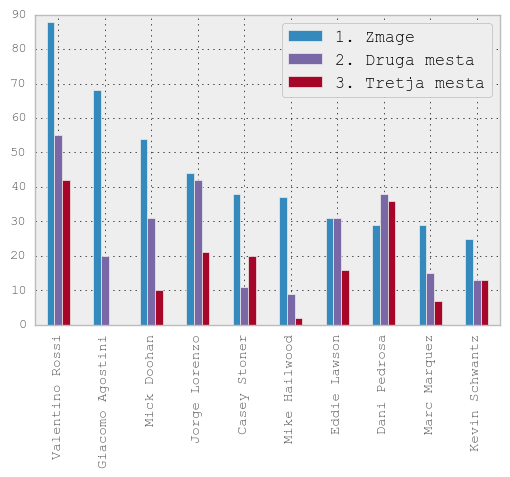

In [140]:
tabela_dirkacev[:10].plot(kind = 'bar')

In [134]:
prvaki = skupni_rezultati['Prvak'].value_counts()
podprvaki = skupni_rezultati['Podprvak'].value_counts()
skupno = {'Naslovi': prvaki, 'Podnaslovi': podprvaki}

tabela_skupno = pd.DataFrame(skupno).fillna(0).astype(int)
tabela_skupno.sort_values('Naslovi', ascending = False)[:10]

,Naslovi,Podnaslovi
Giacomo Agostini,8,1
Valentino Rossi,7,5
Mick Doohan,5,2
Mike Hailwood,4,3
Geoff Duke,4,1
John Surtees,4,0
Eddie Lawson,4,1
Marc Marquez,3,0
Kenny Roberts,3,1
Jorge Lorenzo,3,3


In [38]:
mostva_zmage = rezultati_dirk['Mostvo_zmagovalca'].value_counts()[:10]
mostva_zmage

Honda         279
Yamaha        222
MV Agusta     139
Suzuki         91
Gilera         35
Ducati         33
Norton         21
AJS             5
Moto Guzzi      3
Cagiva          3
Name: Mostvo_zmagovalca, dtype: int64

In [42]:
proizvajalci_naslovi = skupni_rezultati['Prvi_proizvajalec'].value_counts()[:20]
proizvajalci_naslovi

Honda        22
MV Agusta    16
Yamaha       14
Suzuki        7
Gilera        5
Norton        2
AJS           1
Ducati        1
Name: Prvi_proizvajalec, dtype: int64

In [53]:
najpogostejse_dirke = rezultati_dirk['Dirka'].value_counts()
najpogostejse_dirke

Netherlands       68
Germany           62
France            53
Spain             49
Nations           41
Belgium           41
Great Britain     40
Japan             30
Australia         28
Tourist Trophy    28
                  ..
Pacific            4
Imola              4
Venezuela          3
Turkey             3
Indonesia          2
Hungary            2
Le Mans            1
Canada             1
FIM                1
Madrid             1
Name: Dirka, dtype: int64

In [71]:
stevilo_dirk_v_letu = rezultati_dirk['Leto'].value_counts()
stevilo_dirk_v_letu

2016    18
2014    18
2013    18
2012    18
2010    18
2008    18
2007    18
2015    18
2011    17
2009    17
        ..
1952     8
1953     8
1954     8
1958     7
1959     7
1960     7
1956     6
1957     6
1950     6
1949     6
Name: Leto, dtype: int64